# Data augmentation

In [1]:
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({'figure.max_open_warning': 0})

% matplotlib inline

def plot_images(images):
    fig = plt.figure(figsize=(20, 20))
    gs = gridspec.GridSpec(1, 10)
    for label in range(10):
        ax = plt.subplot(gs[0, label])
        ax.imshow(images[label].reshape((28, 28)), cmap='gray')
        ax.axis('off')

## Original images

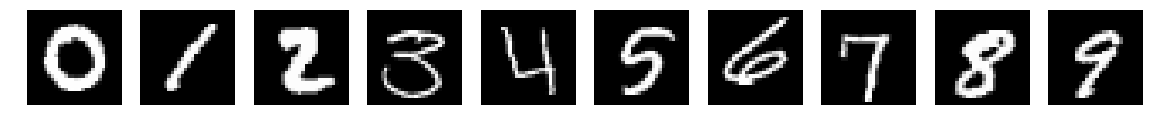

In [2]:
data = pd.read_csv('../data/train.csv', dtype=np.uint8)
data = data.groupby('label')

images = []
for label in range(10):
    img = data.get_group(label).values[0][1:]
    img = np.array(img).reshape((28, 28, 1))
    images.append(img)
plot_images(images)

## Augmented images

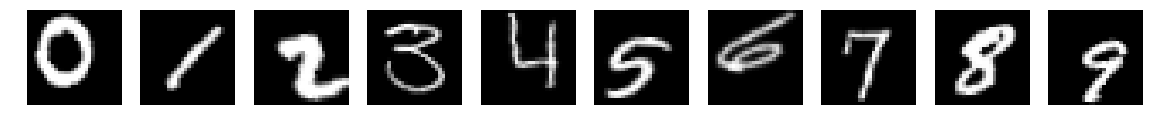

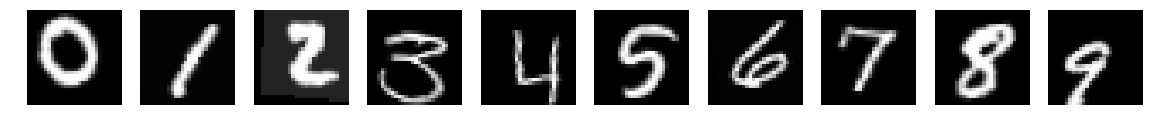

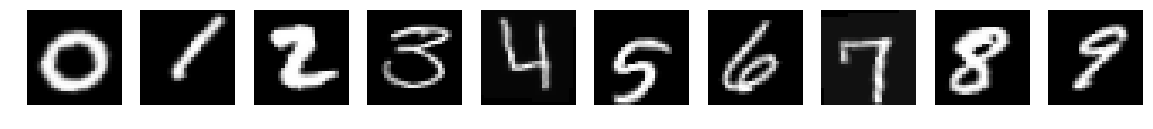

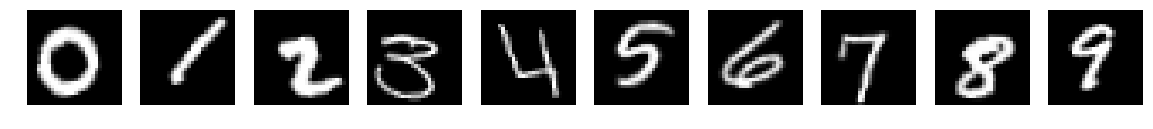

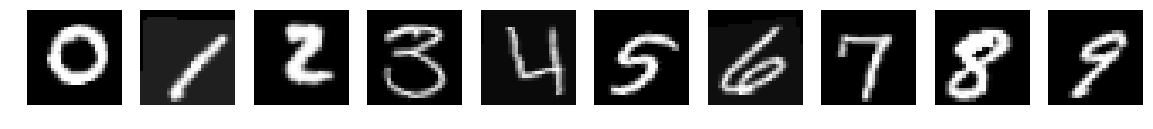

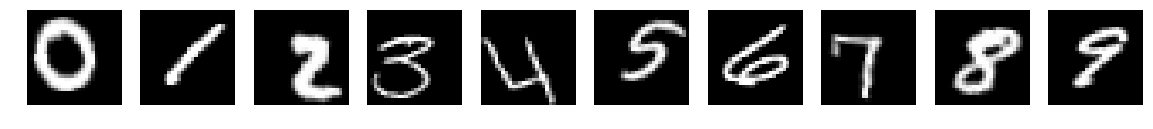

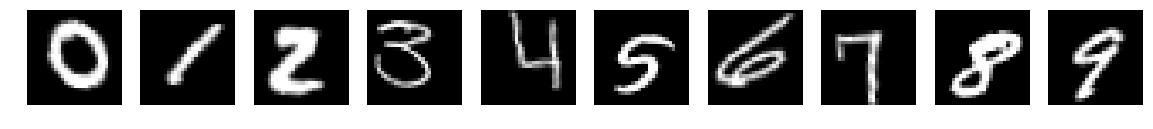

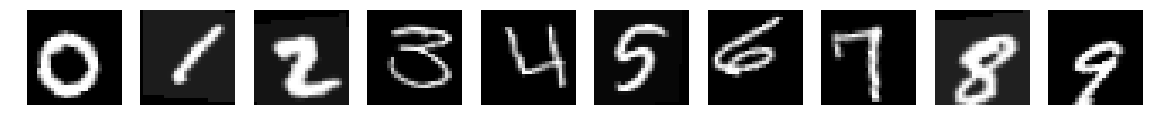

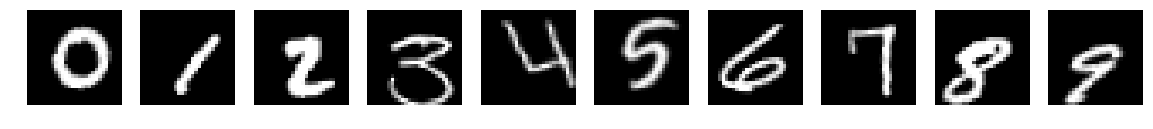

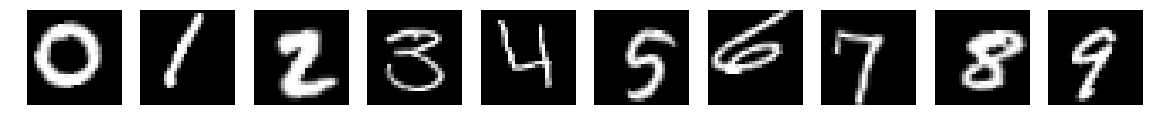

In [3]:
ia.seed(0)
seq = iaa.Sequential([
    iaa.Sometimes(0.5,
                  iaa.GaussianBlur(sigma=(0, 0.5))),
    iaa.ContrastNormalization((0.75, 1.5)),
    iaa.Multiply((0.9, 1.1)),
    iaa.Affine(
        scale={'x': (0.9, 1.1), 'y': (0.9, 1.1)},
        translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)},
        rotate=(-10, 10),
        shear=(-10, 10),
    )
], random_order=True)

for i in range(10):
    plot_images(seq.augment_images(images))